Trees

In [11]:
def run_decision_tree(working_df):
    import pandas as pd
    from sklearn.model_selection import train_test_split
    from sklearn.tree import DecisionTreeClassifier,  plot_tree, export_text
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
    import matplotlib.pyplot as plt

    def print_results(dt_predictions,y_test):
        print("Decision Tree Results:")
        print("Accuracy:", accuracy_score(y_test, dt_predictions))
        print("Confusion Matrix:\n", confusion_matrix(y_test, dt_predictions))
        print("Classification Report:\n", classification_report(y_test, dt_predictions))

    def print_tree(dt_model):
        plt.figure(figsize=(25, 15))
        plot_tree(dt_model, feature_names=['distance', 'shot_type_slapshot'], class_names=['0', '1'], filled=True, rounded=True, impurity=False)
        plt.show()

    def print_tree_rules(dt_model):
        tree_rules = export_text(dt_model, feature_names=['distance', 'shot_type_slapshot', ])
        print("Decision Tree Summary:")
        print(tree_rules)

    def create_tree(working_df):
        X_train, X_test, y_train, y_test = train_test_split(working_df[['distance', 'shot_type_slapshot']], working_df['is_goal'], test_size=0.2, random_state=42)
        class_weights = {0: 0.07, 1: 0.93}
        dt_model = DecisionTreeClassifier(class_weight=class_weights, random_state=42, max_depth=3)
        dt_model.fit(X_train, y_train)
        dt_predictions = dt_model.predict(X_test)
        return_value = (dt_model, dt_predictions,y_test)
        return return_value
    
    (dt_model, dt_predictions, y_test) = create_tree(working_df)
    print_results(dt_predictions,y_test)
    print_tree_rules(dt_model)
    print_tree(dt_model)

In [5]:
def get_working_dataframe(df_base):
    working_df = df_base[['arenaAdjustedShotDistance', 'goal', 'shotType']]
    working_df = working_df.iloc[:]
    working_df['shotType'] = working_df['shotType'].fillna('UNK')
    working_df['shot_type_slapshot'] = (working_df['shotType'] == 'SLAP').astype(int)
    working_df = working_df.rename(columns={'arenaAdjustedShotDistance': 'distance', 'goal': 'is_goal'})
    working_df = working_df[['distance', 'shot_type_slapshot', 'is_goal',]]
    return working_df

In [6]:
def get_base_dataframe():
    import pandas as pd
    file_path = 'shots_2022.csv'
    df_base = pd.read_csv(file_path)
    return df_base

Decision Tree Results:
Accuracy: 0.5792428091452921
Confusion Matrix:
 [[12864  9738]
 [  531  1273]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.57      0.71     22602
           1       0.12      0.71      0.20      1804

    accuracy                           0.58     24406
   macro avg       0.54      0.64      0.46     24406
weighted avg       0.90      0.58      0.68     24406

Decision Tree Summary:
|--- distance <= 35.87
|   |--- distance <= 14.09
|   |   |--- distance <= 5.05
|   |   |   |--- class: 1
|   |   |--- distance >  5.05
|   |   |   |--- class: 1
|   |--- distance >  14.09
|   |   |--- distance <= 29.14
|   |   |   |--- class: 1
|   |   |--- distance >  29.14
|   |   |   |--- class: 0
|--- distance >  35.87
|   |--- distance <= 44.29
|   |   |--- shot_type_slapshot <= 0.50
|   |   |   |--- class: 0
|   |   |--- shot_type_slapshot >  0.50
|   |   |   |--- class: 0
|   |--- distance >  44.29
|   |   |---

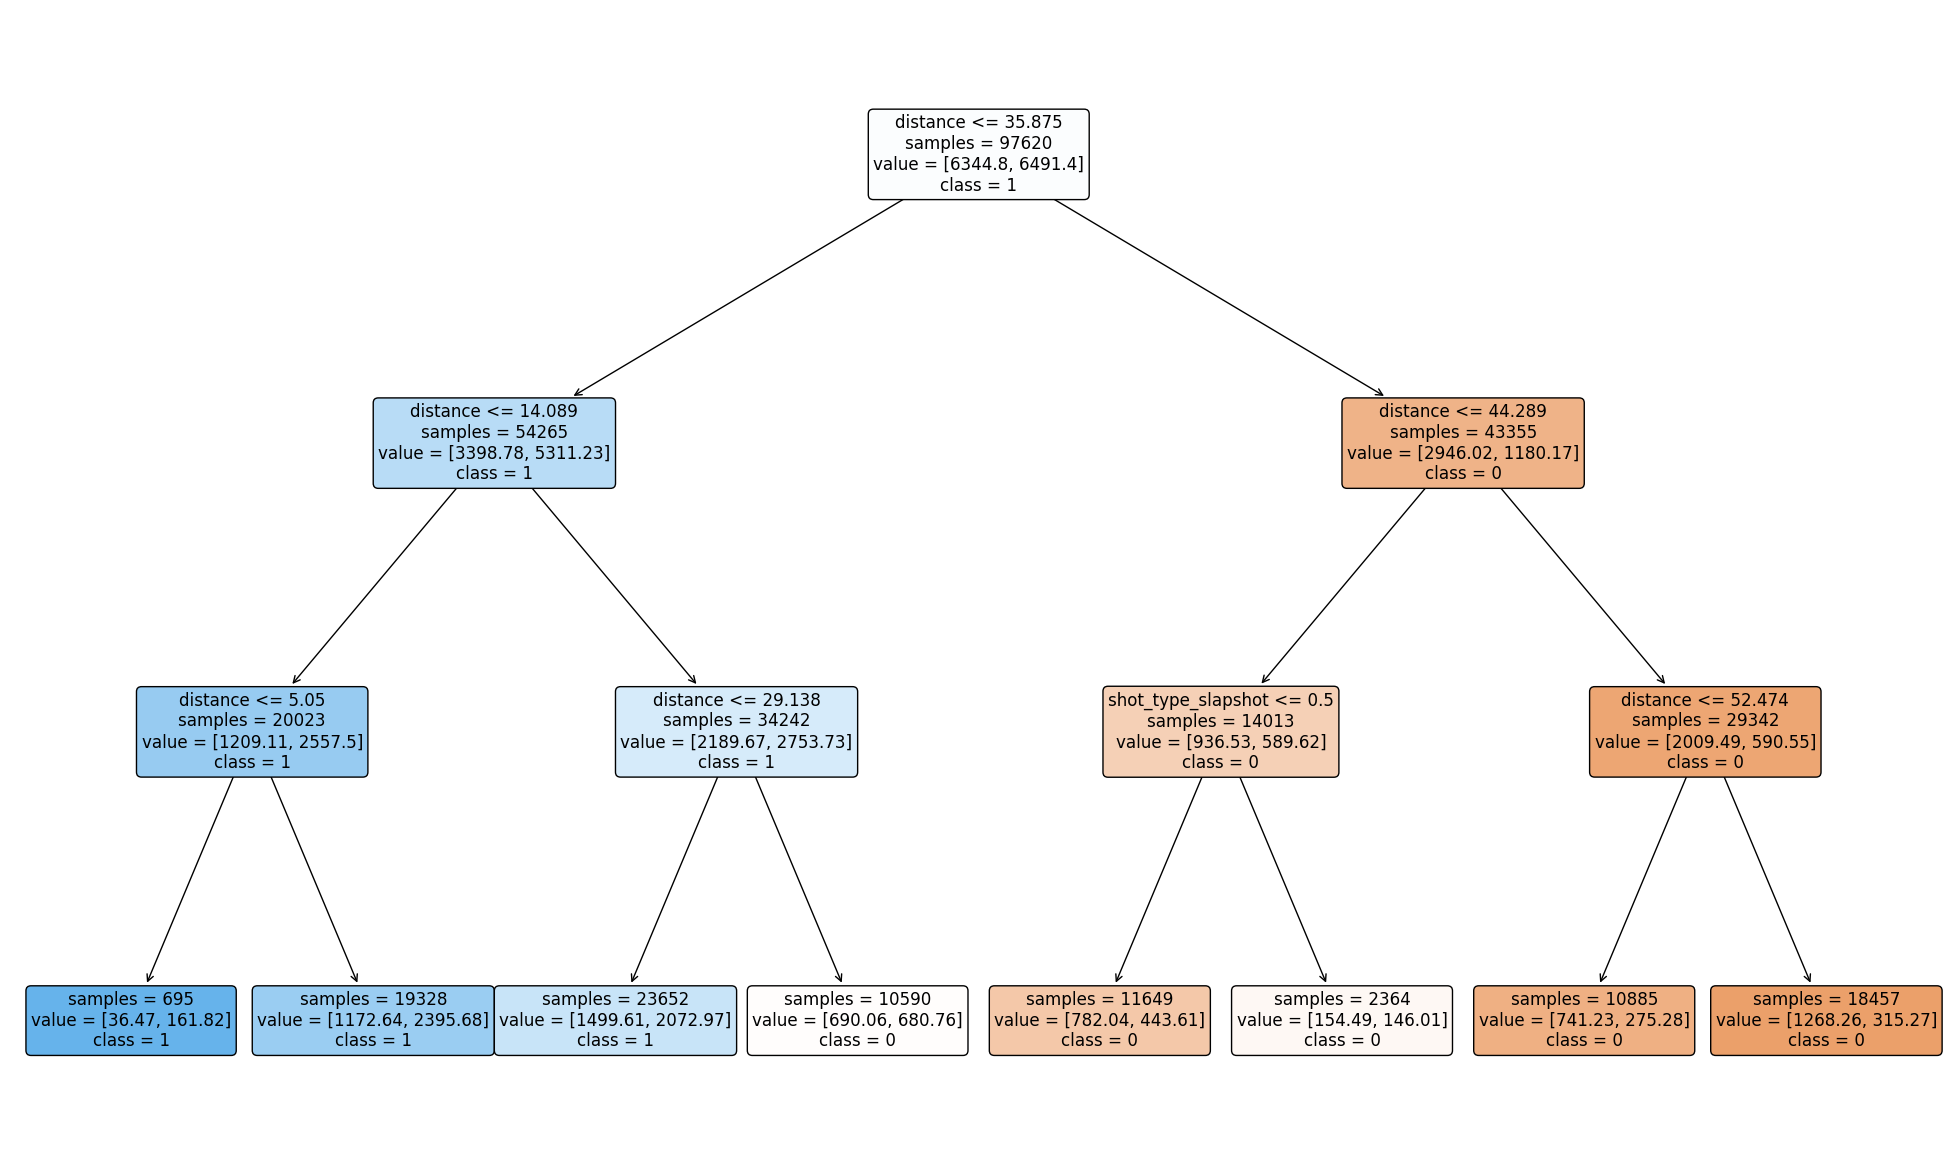

In [12]:
base_df = get_base_dataframe()
working_df = get_working_dataframe(base_df)
run_decision_tree(working_df)